In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes import *
from funcoes import read_QE_band as readband
from wulffpack import SingleCrystal

# CsPbBr$_3$

In [6]:
df_001 = pd.read_csv('CsPbBr3/001.txt', sep = ' ')
df_110 = pd.read_csv('CsPbBr3/110.txt', sep = ' ')
df_111 = pd.read_csv('CsPbBr3/111.txt', sep = ' ')

E_bulk, E_slab, n_bulk, n_slab, A = df_001['Ebulk'][0], df_001['Et'], 5.0, df_001['Nat'], df_001['A']
df_001['Ess'] = single_surface(E_bulk, E_slab, n_bulk, n_slab, A)

E_bulk, E_slab, n_bulk, n_slab, A = df_110['Ebulk'][0], df_110['Et'], 5.0, df_110['Nat'], df_110['A']
df_110['Ess'] = single_surface(E_bulk, E_slab, n_bulk, n_slab, A)

E_bulk, E_slab, n_bulk, n_slab, A = df_111['Ebulk'][0], df_111['Et'], 5.0, df_111['Nat'], df_111['A']
df_111['Ess'] = single_surface(E_bulk, E_slab, n_bulk, n_slab, A)


In [7]:
df_001

,N,Et,Nat,A,Ebulk,Ess
0,2,-1899.839609,5,35.4,-1899.862275,0.069786
1,4,-3799.696164,10,35.4,NaN,0.087395
2,6,-5699.556155,15,35.4,NaN,0.094426
3,10,-9499.277559,25,35.4,NaN,0.104112


In [8]:
df_110

,N,Et,Nat,A,Ebulk,Ess
0,2,-1899.824715,5,50.063,-1899.862275,0.081771
1,6,-5699.515014,15,50.063,NaN,0.156339
2,8,-7599.360712,20,50.063,NaN,0.192430
3,10,-9499.208871,25,50.063,NaN,0.223161


In [9]:
df_111

,N,Et,Nat,A,Ebulk,Ess
0,2,-1899.790196,5,61.314,-1899.862275,0.128129
1,4,-3799.652426,10,61.314,NaN,0.128209
2,6,-5699.504449,15,61.314,NaN,0.146432
3,8,-7599.356941,20,61.314,NaN,0.163822
4,10,-9499.211628,25,61.314,NaN,0.177310


Text(0.5, 0.98, 'Surface energy and slab width')

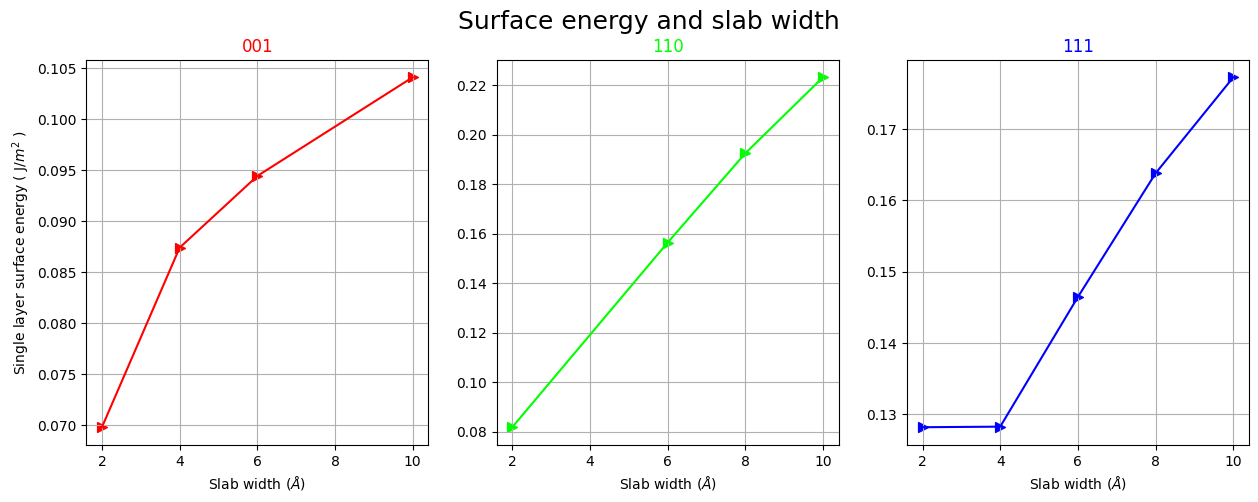

In [10]:
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(15, 5))
tabelas = [df_001, df_110, df_111]
pl = ['001', '110', '111']
colors = ['r', 'lime', 'b']
u = 0
for ax in [ax1,ax2,ax3]:
    
    ax.scatter(tabelas[u]['N'], tabelas[u]['Ess'], marker = '>', color = colors[u], s = 50)
    ax.plot(tabelas[u]['N'], tabelas[u]['Ess'], color = colors[u])
    ax.set_title(pl[u], c = colors[u], fontsize = 12)
    ax.set_xlabel(r'Slab width ($\AA$)')
    if u == 0:
        ax.set_ylabel(r'Single layer surface energy ( J/$m^2$ )')
    
    #ax.set_yscale('log')
    ax.grid('--')
    u+=1
plt.suptitle('Surface energy and slab width', fontsize=18)

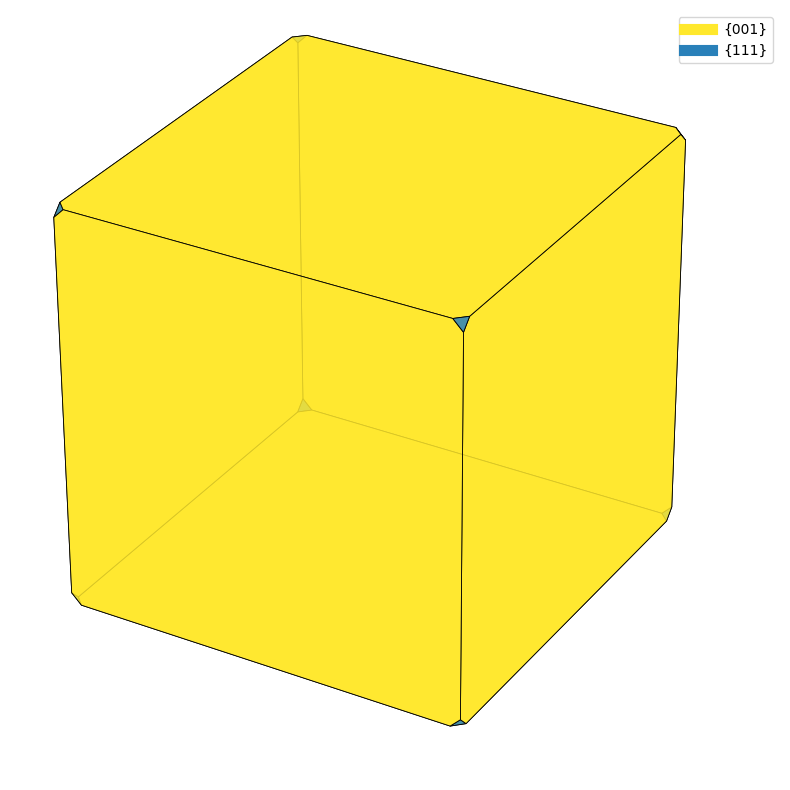

In [11]:
Es_001 = max(df_001['Ess'])
Es_110 = max(df_110['Ess'])
Es_111 = max(df_111['Ess'])

surface_energies = {(0,0,1): Es_001,
                    (1,1,0): Es_110,
                    (1,1,1): Es_111,}
vacuum_particle = SingleCrystal(surface_energies)
vacuum_particle.translate_particle([0,9,2])
continuous_colors = vacuum_particle.get_continuous_color_scheme()
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
vacuum_particle.make_plot(ax, colors = continuous_colors, linewidth =.6)
ax.legend()

## Surface energy calculations methodology

### 001

In [12]:
E_BULK = -1899.86227463 # Ry
E_FROZEN = -7599.39907760 # Ry
E_RELAX = -7599.36055262 # Ry
E_CsBr_RELAX = -7599.37559945 # Ry
E_PbBr2_RELAX = -7599.37874410 # Ry
n_SLAB = 20
n_BULK = 5
A = 35.4 # A²
t = 0.0001
STOP = 0.000265

#### Single surface

In [13]:
E_s_SS = single_surface(E_BULK, E_RELAX, n_BULK, n_SLAB, A)
print("001 Surface energy:", E_s_SS, "J/m²")

001 Surface energy: 0.2726254769588399 J/m²


#### Cleavage energy

In [14]:
E_CsBr_CE, E_PbBr2_CE = cleavage_energy(E_BULK, E_FROZEN, E_CsBr_RELAX, E_PbBr2_RELAX, n_SLAB, n_BULK, A)
print("001-Cs Surface energy:", E_CsBr_CE, "J/m²")
print("001-Pb Surface energy:", E_PbBr2_CE, "J/m²")

001-Cs Surface energy: 0.2985848114566983 J/m²
001-Pb Surface energy: 0.2792205787526489 J/m²


#### Simultaneous equations

In [15]:
E_CsBr_SE, E_PbBr2_SE = simultaneous_equations(E_BULK, E_FROZEN, E_RELAX, E_CsBr_RELAX, E_PbBr2_RELAX, n_SLAB, n_BULK, A, t, STOP)
print("001-Cs Surface energy:", E_CsBr_SE, "J/m²")
print("001-Pb Surface energy:", E_PbBr2_SE, "J/m²")

001-Cs Surface energy: 0.2814539815306941 J/m²
001-Pb Surface energy: 0.2719333201669048 J/m²


### 110

In [16]:
E_BULK = -1899.86227463 # Ry
E_FROZEN = -7599.18493294 # Ry
E_RELAX = -7599.26364745 # Ry
E_Br2_RELAX = -7599.19889714 # Ry
E_CsPbBr_RELAX = -7599.21307807 # Ry
n_SLAB = 20
n_BULK = 5
A = 50.063 # A²
t = 0.0001
STOP = 0.00638

#### Single surface

In [17]:
E_s_SS = single_surface(E_BULK, E_RELAX, n_BULK, n_SLAB, A)
print("110 Surface energy:", E_s_SS, "J/m²")

110 Surface energy: 0.4037510979476026 J/m²


#### Cleavage energy

In [18]:
E_Br2_CE, E_CsPbBr_CE = cleavage_energy(E_BULK, E_FROZEN, E_Br2_RELAX, E_CsPbBr_RELAX, n_SLAB, n_BULK, A)
print("110-Br2 Surface energy:", E_Br2_CE, "J/m²")
print("110-CsPbBr Surface energy:", E_CsPbBr_CE, "J/m²")

110-Br2 Surface energy: 0.5143190643288001 J/m²
110-CsPbBr Surface energy: 0.45257160654899325 J/m²


#### Simultaneous equations

In [19]:
E_Br2_SE, E_CsPbBr_SE = simultaneous_equations(E_BULK, E_FROZEN, E_RELAX, E_Br2_RELAX, E_CsPbBr_RELAX, n_SLAB, n_BULK, A, t, STOP)
print("110-Br2 Surface energy:", E_Br2_SE, "J/m²")
print("110-CsPbBr Surface energy:", E_CsPbBr_SE, "J/m²")

001-Cs Surface energy: 0.43697025337674883 J/m²
001-Pb Surface energy: 0.40980452830081465 J/m²


### 111

In [20]:
E_BULK = -1899.86227463 # Ry
E_FROZEN = -7599.19305666 # Ry
E_RELAX = -7599.27697593 # Ry
E_CsBr3_RELAX = -7599.21270421 # Ry
E_Pb_RELAX = -7599.23382408 # Ry
n_SLAB = 20
n_BULK = 5
A = 50.063 # A²
t = 0.0001
STOP = 0.0027

#### Single surface

In [21]:
E_s_SS = single_surface(E_BULK, E_RELAX, n_BULK, n_SLAB, A)
print("110 Surface energy:", E_s_SS, "J/m²")

110 Surface energy: 0.374733263571593 J/m²


#### Cleavage energy

In [22]:
E_CsBr3_CE, E_Pb_CE = cleavage_energy(E_BULK, E_FROZEN, E_CsBr3_RELAX, E_Pb_RELAX, n_SLAB, n_BULK, A)
print("110-Br2 Surface energy:", E_CsBr3_CE, "J/m²")
print("110-CsPbBr Surface energy:", E_Pb_CE, "J/m²")

110-Br2 Surface energy: 0.4718858851903865 J/m²
110-CsPbBr Surface energy: 0.3799244777857635 J/m²


#### Simultaneous equations

In [23]:
E_CsBr3_SE, E_Pb_SE = simultaneous_equations(E_BULK, E_FROZEN, E_RELAX, E_CsBr3_RELAX, E_Pb_RELAX, n_SLAB, n_BULK, A, t, STOP)
print("001-Cs Surface energy:", E_CsBr3_SE, "J/m²")
print("001-Pb Surface energy:", E_Pb_SE, "J/m²")

001-Cs Surface energy: 0.4071014782731212 J/m²
001-Pb Surface energy: 0.3674642306151906 J/m²


### Morphology

0.2792205787526489
0.45257160654899325
0.3799244777857635


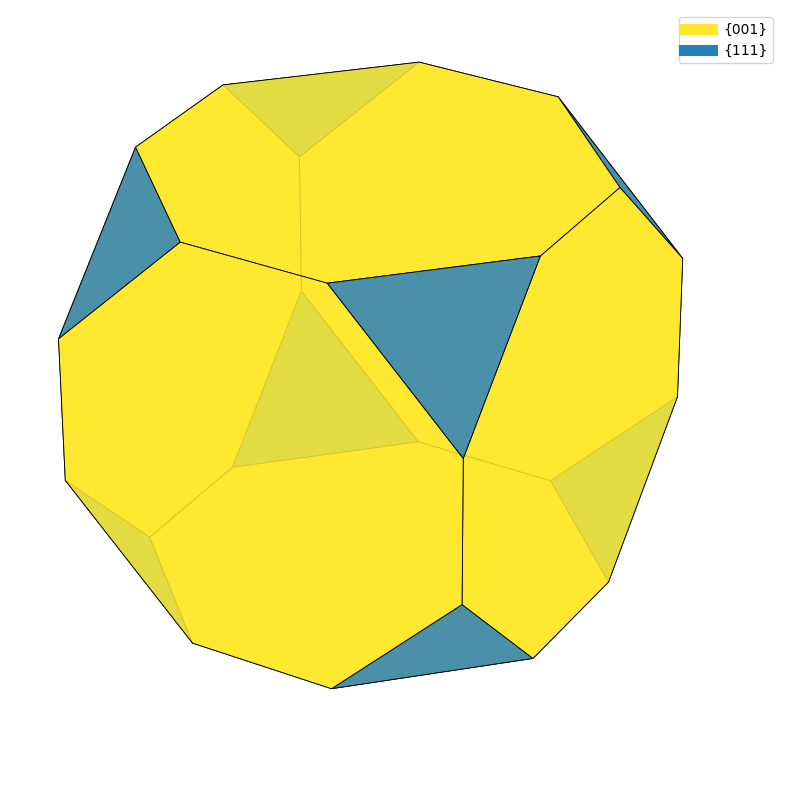

In [46]:
E_s_001 = min([E_CsBr_CE, E_PbBr2_CE])
E_s_110 = min([E_Br2_CE, E_CsPbBr_CE])
E_s_111 = min([E_CsBr3_CE, E_Pb_CE])

print(E_s_001)
print(E_s_110)
print(E_s_111)

surface_energies = {(0,0,1): E_s_001,
                    (1,1,0): E_s_110,
                    (1,1,1): E_s_111,}
vacuum_particle = SingleCrystal(surface_energies)
vacuum_particle.translate_particle([0,9,2])
#}vacuum_particle.rotate_particle([0,9])

continuous_colors = vacuum_particle.get_continuous_color_scheme()
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
vacuum_particle.make_plot(ax, colors = continuous_colors, linewidth =.6)
ax.legend()